# Detecting gender based on first name

In [10]:
import pandas as pd
import numpy as np
from ethnicolr import census_ln, pred_census_ln
import gender_guesser.detector as gender

d = gender.Detector()

Gender is predicted based on first name. A name may be coded as male, female, or androgynous. Now lets create some fake data to work with:

In [102]:
first =  pd.DataFrame({"first": ('Aubrey', 'Ilya', 'Emanuel', 'Jurgen', 'Marta', 'Ingeborg' , 'Andrei', 'Andreia', 'Sergi', 'Melania', 'Joachim', 'Georgie')})
last =  pd.DataFrame({"last":  ('O\'Neal','Beskin','Garcia','Xu', 'Schneider', 'Roger','Pelevin', 'Carillio', 'Navaro', 'Chyi', 'Brabetz', 'Dumas', 'Taylor')})

In [103]:
gender = pd.DataFrame({'gender':()})
gender
for i in range (0,12):
    x = d.get_gender(first['first'][i])
    print(x)
    #gender = gender.append({'gender'}: (x), ignore_index=True)

andy
male
male
male
female
female
male
female
male
female
male
andy


Just 2 names, Aubrey and Georgie, are calculated in as androgynous. A more sophisticated model might use the endings 'ey' and 'ie' to predict these as girl's names. 

# Predicting Ethnicity based on last name

The ethnicolr library predicts ethnicity based on last name, according to the U.S. census. This method is limitted in that is groups ethnicities into broad groups (i.e. white, asian pacific islander, black, hispanic). Census data from other countries are limitted, but hopefully in the future they will be more accessible. 

Note in the results that French, German, British, Irish, Filipino and Russian names are all classified as white.

In [82]:
ethnicity = pred_census_ln(last, 'last')
ethnicity

,last,race,api,black,hispanic,white
0,O'Neal,white,0.016331,0.361271,0.046748,0.862671
1,Beskin,white,0.005463,0.149613,0.024858,0.854131
2,Garcia,hispanic,0.007330,0.002251,0.908621,0.037340
3,Xu,api,0.990549,0.000068,0.001058,0.001288
4,Schneider,white,0.001744,0.006071,0.010342,0.986659
5,Roger,white,0.001714,0.033316,0.021047,0.894457
6,Pelevin,white,0.005253,0.065462,0.015692,0.731230
7,Carillio,white,0.023430,0.002345,0.136814,0.150543
8,Navaro,hispanic,0.013820,0.003073,0.361288,0.126328
9,Chyi,api,0.951188,0.019236,0.032621,0.008878


# Geolocation

The trickiest bit of this project is geocoding, as Google API limits calls to 2,500 calls per day. Let's attempt to make our own gazeteer based on the most common places in our library. We will call the Goggle Maps API on only these most frequent locations.

In [91]:
location =  pd.DataFrame({"location": ('Berlin', 'Berlin, Deutschland', 'Hannover', 
                        'Paris', 'Berlin, Germany', 'Berlin' , 'Holland', 'Holland')})

location

,location
0,Berlin
1,"Berlin, Deutschland"
2,Hannover
3,Paris
4,"Berlin, Germany"
5,Berlin
6,Holland
7,Holland


We now have some fake data. Let's clean up the commas and attempt to split data into cities and countries.

In [92]:
location['location'] = location['location'].str.replace(',', '')
location[['city','country']] = location['location'].loc[location['location'].str.split().str.len() != 0].str.split(expand=True)
location

,location,city,country
0,Berlin,Berlin,None
1,Berlin Deutschland,Berlin,Deutschland
2,Hannover,Hannover,None
3,Paris,Paris,None
4,Berlin Germany,Berlin,Germany
5,Berlin,Berlin,None
6,Holland,Holland,None
7,Holland,Holland,None


Now lets find the most common places in our data set. Once we have a list of frequent places, we will assign lat and long to those places. 

In [93]:
#get requence of city (note we can only infer that the first word in the string is a city)
from collections import Counter
counter = Counter(location['city'])
city = counter.keys()
cities = counter.values()
city_freq = pd.DataFrame.from_dict(counter, orient='index').reset_index()
city_freq = city_freq.rename(columns={'index':'city', 0:'count'})

city_freq = city_freq.sort_values('count', ascending=False)
city_freq = city_freq.reset_index(drop=True)
city_freq

,city,count
0,Berlin,4
1,Holland,2
2,Hannover,1
3,Paris,1


In [46]:
#Use geopy to call the Google Maps API

from time import sleep
from geopy.geocoders import Nominatim
geolocator = Nominatim()
real_location = geolocator.geocode(city_freq['city'][0])

city_freq['lat'] = np.nan
city_freq['long'] = np.nan

for i in range (0,2):
    real_location = geolocator.geocode(city_freq["city"][i])
    if real_location is None: 
        pass
    else:
        city_freq.loc[i,'lat'] = real_location.latitude
        city_freq.loc[i,'long'] = real_location.longitude
    sleep(5)

city_freq

,city,count,lat,long
0,Berlin,4,52.517037,13.388860
1,Holland,2,42.787602,-86.109083
2,Hannover,1,NaN,NaN
3,New,1,NaN,NaN


Finally, assign these coordinates back to the original location data. You can think of these as our corpus of tweets.

In [55]:
#if location[location['city'][0]].str.contains(city_freq['city'][0]):
                     

To summarize our work, lets graph the demographics we've collected on gender, ethnicity, and location:

In [61]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

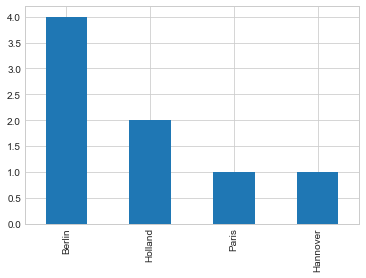

In [94]:
#x = city_freq['city']
#y = city_freq['count']
#city_freq.plot(x,y, kind='hist')

location['city'].value_counts().plot(kind='bar')

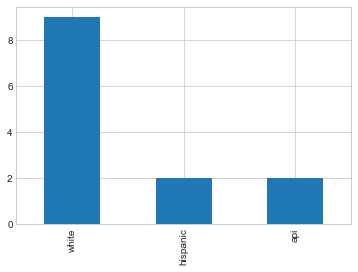

In [83]:
ethnicity['race'].value_counts().plot(kind='bar')

['48.85341', '2.3488']